In [1]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline


N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)   


In [2]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v


In [3]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    
    return psi


In [4]:
gamma = 5.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0

u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)


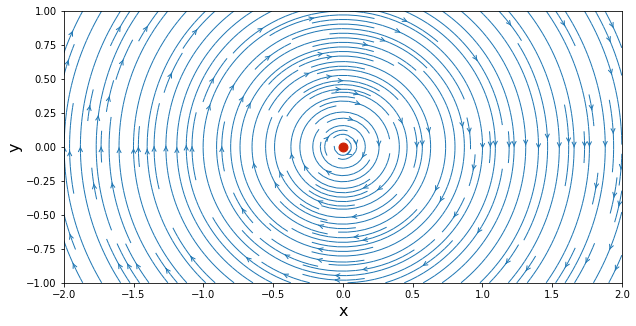

In [5]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');


In [6]:
def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * math.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi


In [11]:
strength_sink = -1.0            # strength of the sink
x_sink, y_sink = 0.0, 0.0  

u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the mesh grid
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)


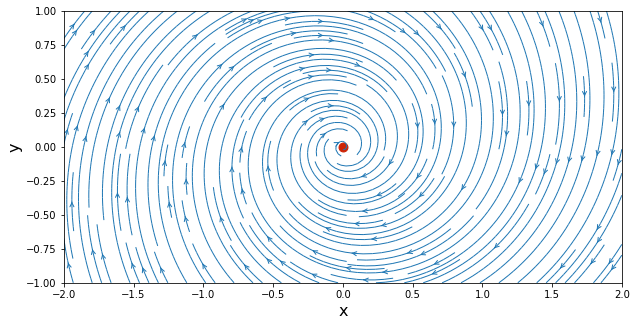

In [12]:
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');


## Flow over a cylinder


In [13]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (-strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = -strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi


In [15]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

kappa = 1.0                           # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0       # location of the doublet

u_inf = 1.0       


In [16]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# freestream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet


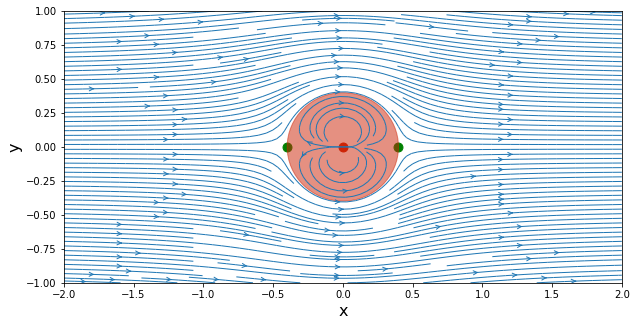

In [17]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the cylinder radius and add the cylinder to the figure
R = math.sqrt(kappa / (2 * math.pi * u_inf))
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

# calculate the stagnation points and add them to the figure
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');


In [19]:
gamma = 4.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0 

u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex


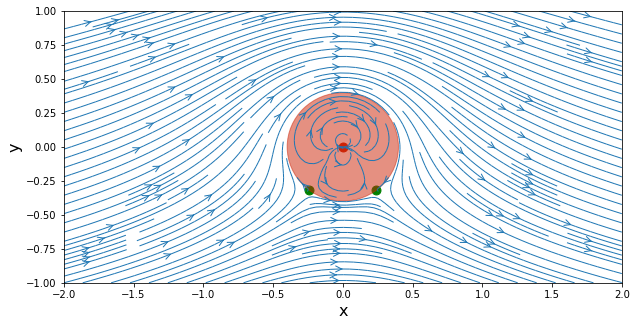

In [20]:
R = math.sqrt(kappa / (2 * math.pi * u_inf))

# calculate the stagnation points
x_stagn1, y_stagn1 = (+math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))
x_stagn2, y_stagn2 = (-math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = pyplot.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');


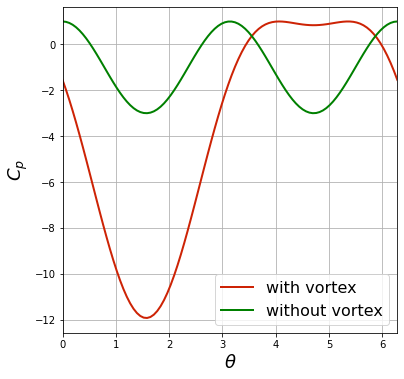

In [21]:
theta = numpy.linspace(0.0, 2 * math.pi, 100)
u_theta = -2 * u_inf * numpy.sin(theta) - gamma / (2 * math.pi * R)

# compute the surface pressure coefficient
cp = 1.0 - (u_theta / u_inf)**2

# if there was no vortex
u_theta_no_vortex = -2 * u_inf * numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf)**2

# plot the surface pressure coefficient
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp,
            label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex,
            label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});


## Assignment Problem -2

In [151]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.axis import Axis as ax


In [10]:
def plane_trans(z,c):
    jt = (z + (c**2)/z)
    return jt


In [11]:
def plot_fig(e):
    x = e.real
    y = e.imag
    plt.plot(x,y)
    

In [12]:
def circle(r):
    theta = np.ones(361)
    for i in range(0,361):
        theta[i] = i*(np.pi/180)
        complex_theta = theta *(1j)
        exponent = np.exp(complex_theta)
    z = r * exponent
    return z


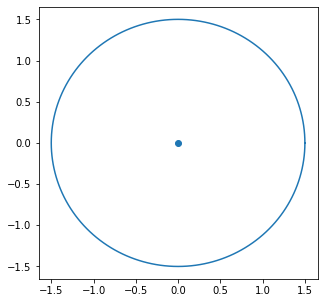

In [13]:
e = circle(1.5)
plt.figure(figsize=(5,5))
plot_fig(e)
plt.scatter(0,0)


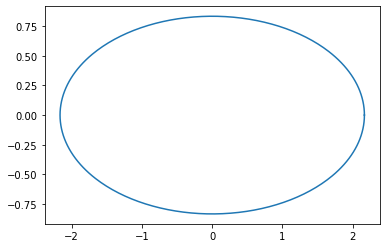

In [14]:
z = plane_trans(e,1)
plot_fig(z)


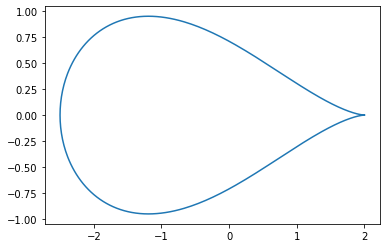

In [15]:
e_new = e-0.5
z_new = plane_trans(e_new,1)
plot_fig(z_new)


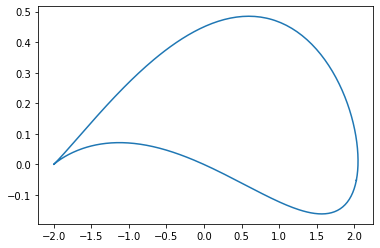

In [16]:
del_x = 0.1
del_y = 0.1
c = 1
radius = np.sqrt((c-del_x)**2 + del_y**2)
z = circle(radius)
real_z = z.real - del_x
imag_z = z.imag + del_y
z_new = real_z + imag_z*(1j)
e_change = plane_trans(z_new,c)
plot_fig(e_change)


## Question-3

In [207]:
def plot_complex(e,c):
    x = e.real
    y = e.imag
    plt.scatter(x,y,c=c,s=0.5)
    #plt.fill(x,y,c=c)
    

In [208]:
def complex_circle(radius,x,y):
    theta = np.linspace(0,2*np.pi,145)
    exp = np.exp(1j)
    circ = radius*exp
    circ.real+x
    circ.imag+y
    return circ


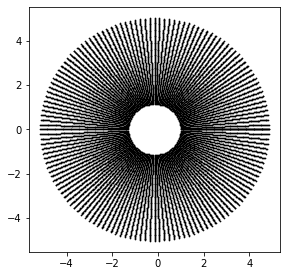

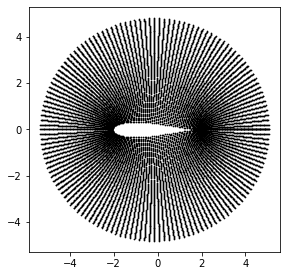

In [209]:
radius = np.linspace(1.15,5,100)
theta = np.linspace(0,2*np.pi,145)
r,th = np.meshgrid(radius,theta)
mesh = r*np.exp(1j*th)
X = mesh.real-0.15
Y = mesh.imag
mesh_new = X + Y*(1j)

plt.figure(figsize=(4.5,4.5))
plot_complex(mesh_new,'black')
plt.figure(figsize=(4.5,4.5))
mesh_jt = plane_trans(mesh_new,1)
plot_complex(mesh_jt,'black')
plt.show()


## Question-4 (Streamlines)

In [210]:
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * np.ones((145, 100), dtype=float)
v_freestream = np.zeros((145, 100), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

#calculating the strength of the doublet
radius = 1.15
kappa = (2*np.pi*u_inf)*(radius**2)

x_doub = -0.15
y_doub = 0


In [211]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    
    u = (-strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
   
    psi = -strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi


In [212]:
circ = circle(1.15)
x = circ.real-0.15
y = circ.imag
z = x + y*(1j)
e = plane_trans(z,1)


In [213]:
def plot_streamlines(mesh,mesh_jt,psi,e,z):
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Z-plane')
    plt.contour(mesh.real,mesh.imag,psi,levels=60,colors='#2F4F4F',linewidths=1.5, linestyles='solid')
    plt.plot(z.real,z.imag,c='#2F4F4F')
    #plt.figure(figsize=(4.5,4.5))
    plt.subplot(122)
    plt.title('Joukowski-plane')
    plt.contour(mesh_jt.real,mesh_jt.imag,psi,levels=60,colors='#2F4F4F',linewidths=1.5, linestyles='solid')
    plt.plot(e.real,e.imag,c='#2F4F4F')
    

In [214]:
#function to calculate the velocity and stream function
u_doublet,v_doublet = get_velocity_doublet(kappa,x_doub,y_doub,mesh_new.real,mesh_new.imag)
psi_doublet = get_stream_function_doublet(kappa,x_doub,y_doub,mesh_new.real,mesh_new.imag)


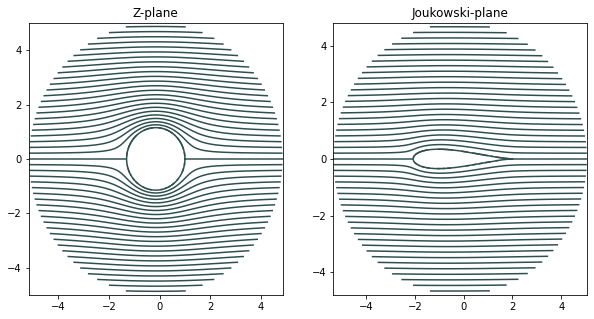

In [215]:
u_total = u_doublet + u_freestream
v_total = v_doublet + v_freestream
psi_total = psi_doublet + psi_freestream

plot_streamlines(mesh_new,mesh_jt,psi_total,e,z)


## Question-4 (Coefficient of pressure)

In [219]:
def plot_pressure(mesh,mesh1,cp,cp1,e,z):
    pyplot.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title('Z-plane')
    contf2 = pyplot.contourf(mesh.real, mesh.imag, cp, levels=np.linspace(-1.0, 1.0, 100), extend='both')
    plt.plot(z.real,z.imag,c='white')
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    cbar = pyplot.colorbar(contf2)

    plt.subplot(122)
    plt.title('Joukowski-Plane')
    plt.plot(e.real,e.imag,c='white')
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    contf3 = pyplot.contourf(mesh1.real, mesh1.imag, cp_xi, levels=np.linspace(-1.0, 1.0, 100), extend='both')
    cbar = pyplot.colorbar(contf3)
    

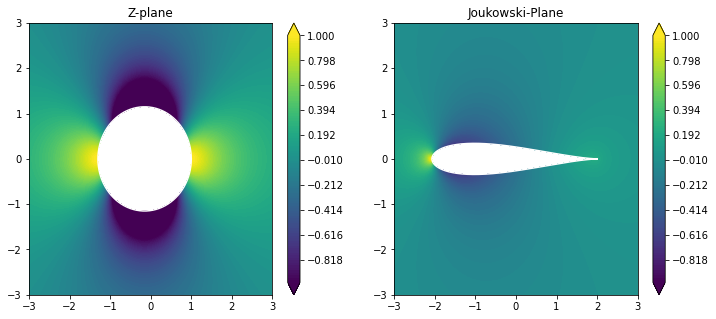

In [220]:
W = u_total - v_total*(1j)
cp = 1.0 - (W.real**2 + W.imag**2) / u_inf**2
xi = 1 - (1/mesh_new)**2
W_xi = W/xi
cp_xi = 1 - (W_xi.real**2 + W_xi.imag**2)/u_inf**2

plot_pressure(mesh_new,mesh_jt,cp,cp_xi,e,z)


## Question -5 (Flow with angle of attack)

In [222]:
alpha = -20*np.pi/180
z1 = (mesh_new - (x_doub+y_doub*(1j)))*np.exp(alpha*1j)


In [223]:
u_aoa,v_aoa = get_velocity_doublet(kappa,0,0,z1.real,z1.imag)
psi_aoa = get_stream_function_doublet(kappa,0,0,z1.real,z1.imag)


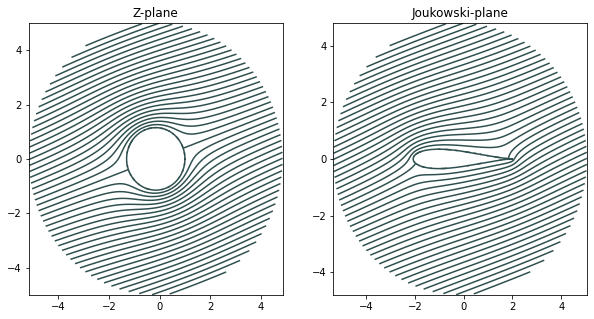

In [224]:
psi_freestream = u_inf*z1.imag
u_total = u_aoa + u_freestream
v_total = v_aoa + v_freestream
psi_total = psi_aoa + psi_freestream

plot_streamlines(mesh_new,mesh_jt,psi_total,e,z)


## Coefficient of Pressure

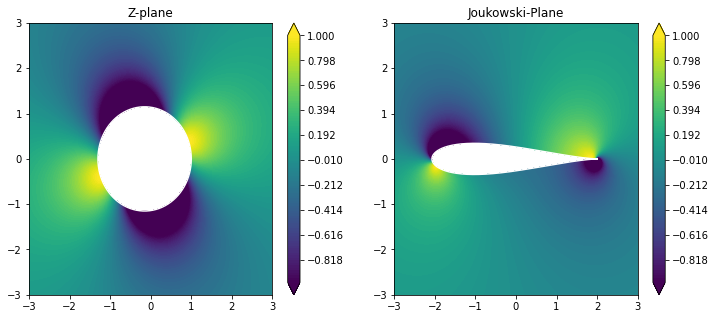

In [225]:
W = u_total - v_total*(1j)
cp = 1.0 - (W.real**2 + W.imag**2) / u_inf**2
xi = 1 - (1/mesh_new)**2
W_xi = W/xi
cp_xi = 1 - (W_xi.real**2 + W_xi.imag**2)/u_inf**2

plot_pressure(mesh_new,mesh_jt,cp,cp_xi,e,z)


## Question-6 (Flow with Circulation)

In [226]:
gamma = - 4 * np.pi * radius * u_inf * np.sin(alpha)


In [227]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    
    return psi


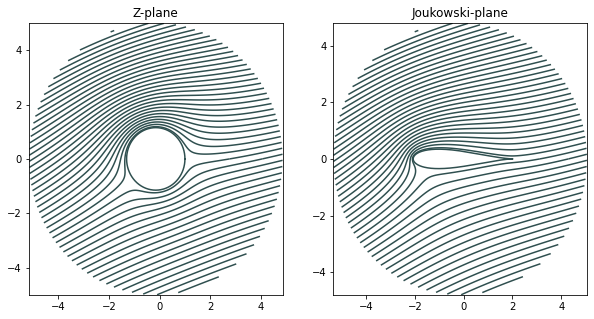

In [228]:
u_vortex,v_vortex = get_velocity_vortex(gamma,0,0,z1.real,z1.imag)
psi_vortex = get_stream_function_vortex(gamma,0,0,z1.real,z1.imag)

u_total = u_aoa + u_freestream + u_vortex
v_total = v_aoa + v_freestream + v_vortex
psi_total = psi_aoa + psi_freestream + psi_vortex

plot_streamlines(mesh_new,mesh_jt,psi_total,e,z)


## Coefficient of Pressure (vortex)

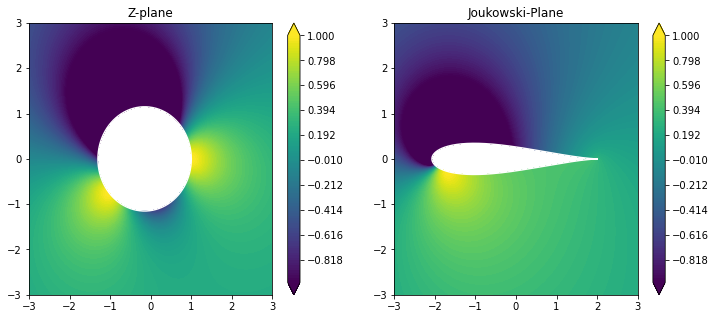

In [229]:
W = u_total - v_total*(1j)
cp = 1.0 - (W.real**2 + W.imag**2) / u_inf**2
xi = 1 - (1/mesh_new)**2
W_xi = W/xi
cp_xi = 1 - (W_xi.real**2 + W_xi.imag**2)/u_inf**2

plot_pressure(mesh_new,mesh_jt,cp,cp_xi,e,z)


In [204]:
lift_kutta = 1.225 * u_inf * gamma * np.cos(-alpha) 
print('the lift generated by the airfoil is ',lift_kutta)


the lift generated by the airfoil is  5.689594225314541
